In [1]:
import pyodbc
import yfinance as yf
import pandas as pd

# Verbindungsstring
conn_str = (
    r'Driver=SQL Server;'
    r'Server=.\SQLEXPRESS;'
    r'Database=studienprojekt;'
    r'Trusted_Connection=yes;'
)

# Verbindung zur Datenbank herstellen
cnxn = pyodbc.connect(conn_str)
cursor = cnxn.cursor()

# Tabelle prüfen
table_name = "stock_data"  # Name der Zieltabelle
start_date = "2016-01-01"  # Startdatum, ab dem Daten überprüft werden sollen
end_date = "2021-10-01"  # Enddatum, bis zu dem Daten überprüft werden sollen

# Daten aus der Tabelle in einen DataFrame laden
select_query = f"SELECT * FROM {table_name} WHERE timestamp >= ? AND timestamp <= ?"
df_existing_data = pd.read_sql(select_query, cnxn, params=(start_date, end_date))

# Verbindung schließen
cursor.close()
cnxn.close()

# DataFrame anzeigen
print(df_existing_data.head())

   id  timestamp       open       high        low      close     volume
0   1 2016-01-04  25.652500  26.342501  25.500000  26.337500  270597600
1   2 2016-01-05  26.437500  26.462500  25.602501  25.677500  223164000
2   3 2016-01-06  25.139999  25.592501  24.967501  25.174999  273829600
3   4 2016-01-07  24.670000  25.032499  24.107500  24.112499  324377600
4   5 2016-01-08  24.637501  24.777500  24.190001  24.240000  283192000


C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_13800\3196401638.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_existing_data = pd.read_sql(select_query, cnxn, params=(start_date, end_date))


   id  timestamp       open       high        low      close     volume
0   1 2016-01-04  25.652500  26.342501  25.500000  26.337500  270597600
1   2 2016-01-05  26.437500  26.462500  25.602501  25.677500  223164000
2   3 2016-01-06  25.139999  25.592501  24.967501  25.174999  273829600
3   4 2016-01-07  24.670000  25.032499  24.107500  24.112499  324377600
4   5 2016-01-08  24.637501  24.777500  24.190001  24.240000  283192000


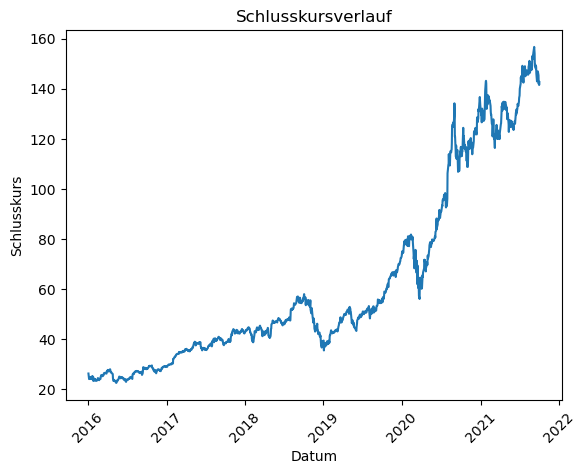

In [2]:
import matplotlib.pyplot as plt

# DataFrame anzeigen
print(df_existing_data.head())

# Daten plotten
plt.plot(df_existing_data['timestamp'], df_existing_data['close'])
plt.xlabel('Datum')
plt.ylabel('Schlusskurs')
plt.title('Schlusskursverlauf')
plt.xticks(rotation=45)
plt.show()


In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# DataFrame anzeigen
print(df_existing_data.head())

# Daten vorbereiten
df_existing_data['timestamp'] = pd.to_datetime(df_existing_data['timestamp'])
df_existing_data.set_index('timestamp', inplace=True)

# ARIMA-Modell erstellen
model = sm.tsa.ARIMA(df_existing_data['close'], order=(1, 0, 0))
results = model.fit()

# Forecast erstellen
forecast_start_date = df_existing_data.index[-1] + pd.DateOffset(days=1)
forecast_end_date = pd.to_datetime('2023-12-31')  # Enddatum für den Forecast
forecast = results.predict(start=forecast_start_date, end=forecast_end_date)

# Plot erstellen
plt.plot(df_existing_data.index, df_existing_data['close'], label='Historische Daten')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Datum')
plt.ylabel('Schlusskurs')
plt.title('ARIMA Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()


   id  timestamp       open       high        low      close     volume
0   1 2016-01-04  25.652500  26.342501  25.500000  26.337500  270597600
1   2 2016-01-05  26.437500  26.462500  25.602501  25.677500  223164000
2   3 2016-01-06  25.139999  25.592501  24.967501  25.174999  273829600
3   4 2016-01-07  24.670000  25.032499  24.107500  24.112499  324377600
4   5 2016-01-08  24.637501  24.777500  24.190001  24.240000  283192000


C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameter

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [4]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# DataFrame anzeigen
print(df_existing_data.head())

# Daten vorbereiten
df_existing_data['timestamp'] = pd.to_datetime(df_existing_data['timestamp'])
df_existing_data.set_index('timestamp', inplace=True)

# ARIMA-Modell erstellen
model = sm.tsa.ARIMA(df_existing_data['close'], order=(1, 0, 0))
results = model.fit()

# Forecast erstellen
forecast_start_date = df_existing_data.index[-1] + pd.DateOffset(days=1)
forecast_end_date = pd.to_datetime('2023-12-31')  # Enddatum für den Forecast
forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date)
forecast = results.predict(start=forecast_index[0], end=forecast_index[-1])

# Plot erstellen
plt.plot(df_existing_data.index, df_existing_data['close'], label='Historische Daten')
plt.plot(forecast_index, forecast, label='Forecast')
plt.xlabel('Datum')
plt.ylabel('Schlusskurs')
plt.title('ARIMA Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()


            id       open       high        low      close     volume
timestamp                                                            
2016-01-04   1  25.652500  26.342501  25.500000  26.337500  270597600
2016-01-05   2  26.437500  26.462500  25.602501  25.677500  223164000
2016-01-06   3  25.139999  25.592501  24.967501  25.174999  273829600
2016-01-07   4  24.670000  25.032499  24.107500  24.112499  324377600
2016-01-08   5  24.637501  24.777500  24.190001  24.240000  283192000


KeyError: 'timestamp'

In [6]:
print(df_existing_data.head())


            id       open       high        low      close     volume
timestamp                                                            
2016-01-04   1  25.652500  26.342501  25.500000  26.337500  270597600
2016-01-05   2  26.437500  26.462500  25.602501  25.677500  223164000
2016-01-06   3  25.139999  25.592501  24.967501  25.174999  273829600
2016-01-07   4  24.670000  25.032499  24.107500  24.112499  324377600
2016-01-08   5  24.637501  24.777500  24.190001  24.240000  283192000


In [7]:
import pyodbc
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Verbindungsstring
conn_str = (
    r'Driver=SQL Server;'
    r'Server=.\SQLEXPRESS;'
    r'Database=studienprojekt;'
    r'Trusted_Connection=yes;'
)

# Verbindung zur Datenbank herstellen
cnxn = pyodbc.connect(conn_str)
cursor = cnxn.cursor()

# Tabelle prüfen
table_name = "stock_data"  # Name der Zieltabelle
start_date = "2016-01-01"  # Startdatum, ab dem Daten überprüft werden sollen
end_date = "2021-10-01"  # Enddatum, bis zu dem Daten überprüft werden sollen

# Daten aus der Tabelle in einen DataFrame laden
select_query = f"SELECT * FROM {table_name} WHERE timestamp >= ? AND timestamp <= ?"
df_existing_data = pd.read_sql(select_query, cnxn, params=(start_date, end_date))

# Verbindung schließen
cursor.close()
cnxn.close()

# Daten vorbereiten
df_existing_data['timestamp'] = pd.to_datetime(df_existing_data['timestamp'])
df_existing_data.set_index('timestamp', inplace=True)

# ARIMA-Modell erstellen
model = ARIMA(df_existing_data['close'], order=(1, 0, 0))
results = model.fit()

# Vorhersage durchführen
forecast_start_date = df_existing_data.index[-1] + pd.DateOffset(days=1)
forecast_end_date = pd.to_datetime('2023-12-31')  # Enddatum für den Forecast
forecast = results.predict(start=forecast_start_date, end=forecast_end_date)

# Plot erstellen
plt.plot(df_existing_data.index, df_existing_data['close'], label='Historische Daten')
plt.plot(forecast.index, forecast, label='Vorhersage')
plt.xlabel('Datum')
plt.ylabel('Close Preis')
plt.title('Vorhersage mit ARIMA')
plt.legend()
plt.show()


C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_13800\37629487.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_existing_data = pd.read_sql(select_query, cnxn, params=(start_date, end_date))
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A da

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# DataFrame nach Datum sortieren
df_existing_data.sort_values('timestamp', inplace=True)

# Index erstellen
df_existing_data['timestamp'] = pd.to_datetime(df_existing_data['timestamp'])
df_existing_data.set_index('timestamp', inplace=True)

# Anzahl der vorhandenen Datenpunkte im Index
num_existing_data = len(df_existing_data.index)

# ARIMA-Modell erstellen
model = ARIMA(df_existing_data['close'], order=(1, 1, 1))
results = model.fit()

# Anzahl der zu prognostizierenden Datenpunkte
num_forecast = 28

# Vorhersage durchführen
forecast_start_date = df_existing_data.index[-1] + pd.DateOffset(days=1)
forecast_end_date = forecast_start_date + pd.DateOffset(days=num_forecast)
forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')
forecast = results.predict(start=forecast_start_date, end=forecast_end_date)

# Plot erstellen
plt.plot(df_existing_data.index, df_existing_data['close'], label='Historische Daten')
plt.plot(forecast_index, forecast, label='Vorhersage')
plt.xlabel('Datum')
plt.ylabel('Schlusskurs')
plt.title('Vorhersage des Schlusskurses')
plt.legend()
plt.show()


KeyError: 'timestamp'